# Data Visualisation
----
## Scooter Registration by Fuel Type
First, I want to know whether the sales of electric scooters increase since September, 2012. The data I used is `reg_w.csv` from the `output` folder. As the number of registrations is for individual city, I sum up all cities each month. Then, I create a `ratio` column to show the proportion of electric scooters of all scooter registrations.

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly_express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

init_notebook_mode(connected=True)

reg_w = pd.read_csv("https://raw.githubusercontent.com/yuenhsu/Taiwan-Scooter-Data/master/output/reg_wide.csv", parse_dates=["time"], thousands=",")

reg_w_all = reg_w.resample("MS", on="time").sum()
reg_w_all["ratio"] = (reg_w_all["elec_reg"] / (reg_w_all["gas_reg"] + reg_w_all["elec_reg"])) * 100

reg_w["ratio"] = (reg_w["elec_reg"] / (reg_w["gas_reg"] + reg_w["elec_reg"])) * 100

### Total Number of Scooters 
The stacked bar chart shows the total number of scooter registration by fuel type. The portions for electric scooters, coloured in blue, are too small to be observable initially. It can be seen that the total number of scooters reduced noticably in September 2013, the reasons for which are unclear, and remained relatively constant afterwards. However, the proportions of electric scooters consistently grew. 

The line chart outlines the ratio of electric scooters of all, which increased from the 0.20% in September 2012 to 2.63% in Feburary 2020. The ratio grew increasingly until December 2019, which is the last month before the amount of subsidy is cut to half starting from 2020.

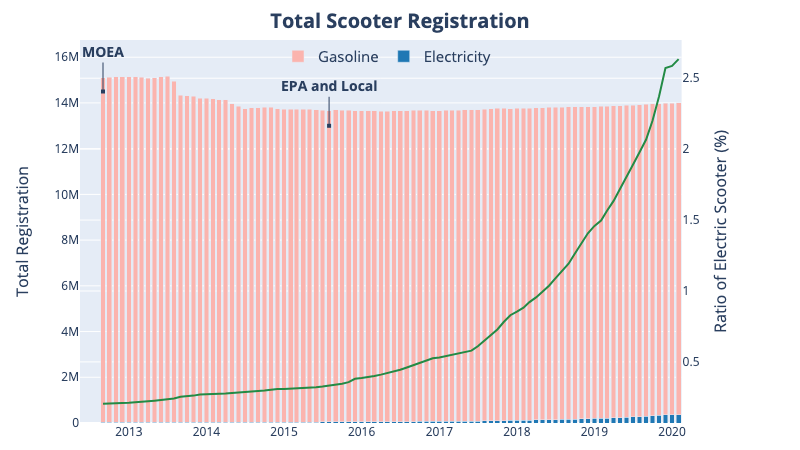

In [3]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        name="Electricity",
        marker_color="#1f78b4",
        x=list(reg_w_all.index),
        y=list(reg_w_all["elec_reg"])),
    secondary_y=False)

fig.add_trace(
    go.Bar(
        name="Gasoline",
        marker_color="#fbb4ae",
        x=list(reg_w_all.index),
        y=list(reg_w_all["gas_reg"])),
    secondary_y=False)

fig.add_trace(
    go.Scatter(
        name='Electric Scooter Ratio',
        marker_color="#238b45",
        marker_line_width=2,
        x=list(reg_w.resample("MS", on="time").sum().index),
        y=list(reg_w_all["ratio"]),
        showlegend=False),
    secondary_y=True)

fig.add_annotation(x="2015-08-01", y=13000000, text="<b>EPA and Local</b>")

fig.add_annotation(x="2012-09-01", y=14500000, text="<b>MOEA</b>")

fig.update_annotations(
    dict(xref="x", yref="y", showarrow=True, arrowhead=7, ax=0, ay=-40)
)


fig.update_layout(
    title={
        "text": "<b>Total Scooter Registration</b>",
        "xanchor": "center",
        "x": 0.5,
        "yanchor": "top",
        "y": 0.97},
    margin=dict(t=40, b=10),
    barmode="stack",
    width=1200,
    height=675,
    font=dict(size=14),
    legend_orientation="h",
    legend=dict(
        xanchor="right",
        yanchor="top",
        x=0.65,
        y=1,
        bgcolor="rgba(0,0,0,0)",
        font=dict(size=15)),
    autosize=True)

fig.update_xaxes(tickfont=dict(size=12))

fig.update_yaxes(
    title_text="Total Registration",
    title=dict(font=dict(size=16)),
    secondary_y=False,
    tickfont=dict(size=12))

fig.update_yaxes(
    title_text="Ratio of Electric Scooter (%)",
    title=dict(font=dict(size=16)),
    secondary_y=True,
    tickfont=dict(size=12))

fig.show(renderer="png", width=800, height=450)
#fig.write_image("output/results1.png")

### Electric Scooter Ratios by City
Majority of the cities follow the similar upward patterns as the entire nation. `Kinmen County`, `Lienchiang County`, and `Penghu County` have very distinct trends. I am not sure about the reasons behind these patterns, however, all of them happened to be outlying islands.

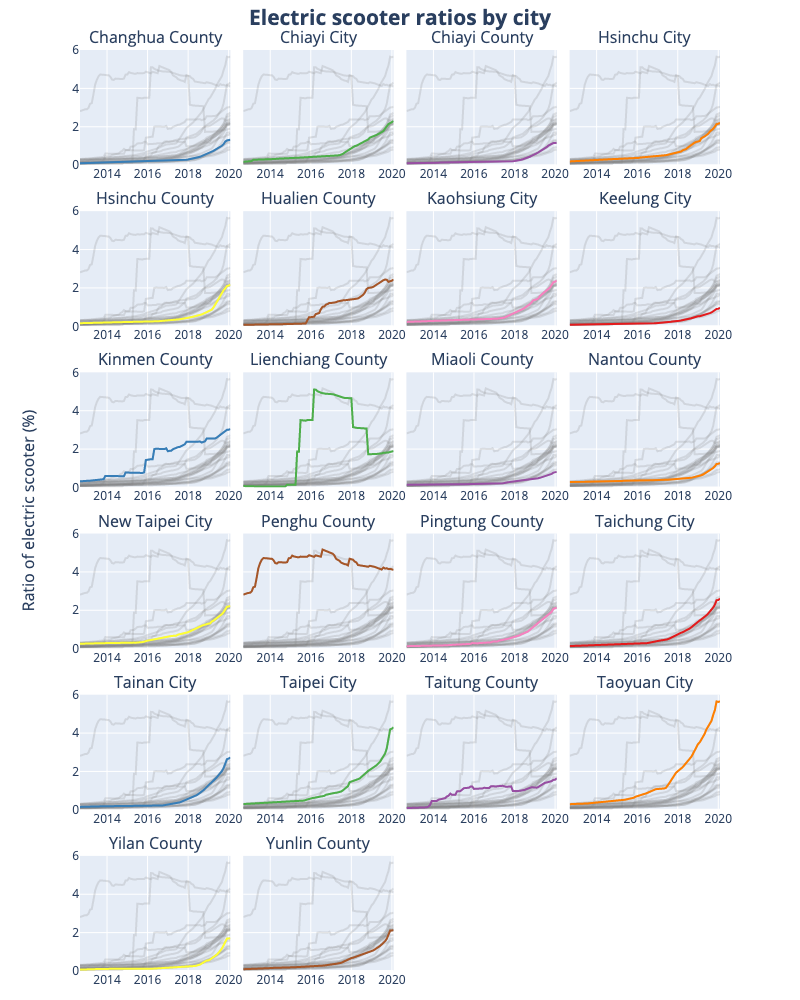

In [4]:
fig = make_subplots(
    rows=6,
    cols=4,
    shared_yaxes=True,
    subplot_titles=sorted(reg_w["city"].unique().tolist()),
    vertical_spacing=0.05,
    horizontal_spacing=0.02,
    y_title="Ratio of electric scooter (%)",
)
palette = [
    "#e41a1c",
    "#377eb8",
    "#4daf4a",
    "#984ea3",
    "#ff7f00",
    "#ffff33",
    "#a65628",
    "#f781bf",
] * 3

row_num = 1
col_num = 1
num = 0
for city in sorted(reg_w["city"].unique().tolist()):
    num += 1
    # data = reg_w[reg_w['city']==city]
    for c in sorted(reg_w["city"].unique().tolist()):
        fig.add_trace(
            go.Scatter(
                x=reg_w[reg_w["city"] == c]["time"],
                y=reg_w[reg_w["city"] == c]["ratio"],
                marker_color="#7f7f7f",
                opacity=0.2,
                marker_size=0.2,
            ),
            row=row_num,
            col=col_num,
        )

    fig.add_trace(
        go.Scatter(
            x=reg_w[reg_w["city"] == city]["time"],
            y=reg_w[reg_w["city"] == city]["ratio"],
            marker_size=1.5,
            mode="lines",
            marker_color=palette[num],
        ),
        row=row_num,
        col=col_num,
    )
    col_num += 1
    if col_num > 4:
        row_num += 1
        col_num = 1

fig.update_layout(
    height=800,
    width=1200,
    showlegend=False,
    title=dict(
        text="<b>Electric scooter ratios by city</b>",
        xanchor="center",
        x=0.5,
        yanchor="top",
        y=0.99,
    ),
    font=dict(size=15),
    margin=dict(b=15, t=50),
)
fig.update_yaxes(range=[0, 6], tickfont=dict(size=12))
fig.update_xaxes(tickfont=dict(size=12))
fig.show(renderer="png", width=800, height=1000)
#fig.write_image('output/results2.png')

-----
## Subsidy
Next, moving on to the relationship between subsidy amount and electric scooter sales. There are three subsidy available for every new electric scooter purchase:

1. **MOEA**
    + Duration - from September 2012
    + Eligibility - **New Purchase** and **Elimination and New Purchase**
    + Amount `moea_amt` - Central government subsidy. Same amount across cities.
    + Application Data `moea_app` - Available.

2. **EPA**
    + Duration - from August 2015
    + Eligibility - **New Purchase**, **Elimination and New Purchase**, and **Elimination**. However, for the purpose of the analysis, I only want to know the effects on purchase the first two types.
    + Amount `epa_amt` - Central government subsidy. Same amount across cities.
    + Application Data `epa_app` - Available.

3. **Local**
    + Duration - from August 2015
    + Eligibility - **New Purchase**, **Elimination and New Purchase**, and **Elimination**. However, for the purpose of the analysis, I only want to know the effects on purchase the first two types.
    + Amount `local_amt` - local subsidy. Amount differs across cities.
    + Application Data - Unavailable. Since applicants typically apply for all three, I approximate the data from the other two programs.

Load data from [output/data.csv](https://raw.githubusercontent.com/yuenhsu/Taiwan-Scooter-Data/master/output/data.csv) first.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/yuenhsu/Taiwan-Scooter-Data/master/output/data.csv', parse_dates = ['time']).drop(columns='Unnamed: 0')
data.head(5)

,time,type,city,epa_app,moea_app,moea_amt,epa_amt,local_amt
0,2012-09-01,New Purchase,Taipei City,NaN,18.0,10000,NaN,NaN
1,2012-09-01,Elimination and Purchase,Taipei City,NaN,19.0,10000,NaN,NaN
2,2012-09-01,Elimination,Taipei City,NaN,0.0,10000,NaN,NaN
3,2012-09-01,New Purchase,Taichung City,NaN,45.0,10000,NaN,NaN
4,2012-09-01,Elimination and Purchase,Taichung City,NaN,45.0,10000,NaN,NaN


As the data is separated by city, I aggregate the data by month to get the national sum.

In [6]:
sub = (
    data.groupby("type")
    .resample("MS", on="time")
    .sum()
    .reset_index()[["time", "type", "epa_app", "moea_app"]]
    .merge(
        data.groupby("type")
        .resample("MS", on="time")
        .mean()
        .reset_index()[["time", "type", "moea_amt", "epa_amt", "local_amt"]],
        on=["time", "type"],
    )
)
sub = sub[sub["type"] != "Elimination"]

sub.loc[sub["type"] != "Elimination", "moea_amt"] = 10000

sub.head(5)

,time,type,epa_app,moea_app,moea_amt,epa_amt,local_amt
35,2012-09-01,Elimination and Purchase,0.0,309.0,10000.0,NaN,NaN
36,2012-10-01,Elimination and Purchase,0.0,358.0,10000.0,NaN,NaN
37,2012-11-01,Elimination and Purchase,0.0,231.0,10000.0,NaN,NaN
38,2012-12-01,Elimination and Purchase,0.0,130.0,10000.0,NaN,NaN
39,2013-01-01,Elimination and Purchase,0.0,75.0,10000.0,NaN,NaN


### MOEA
The subsidy amount, yellow bars, remains the same from 2012 to 2019. However, the application number increases substantially.

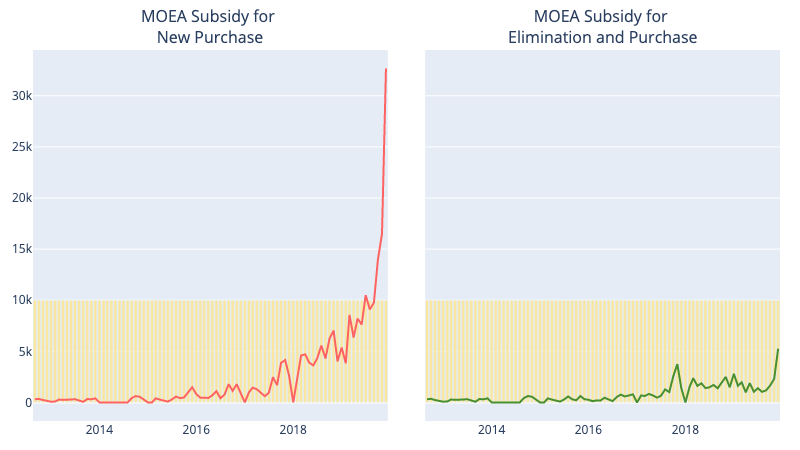

In [10]:
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=[
        "MOEA Subsidy for <br>New Purchase",
        "MOEA Subsidy for <br>Elimination and Purchase",
    ],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["moea_app"],
        marker_color="#ff6361",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["moea_app"],
        marker_color="#488f31",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["moea_amt"],
        marker_color="#F9E79F",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["moea_amt"],
        marker_color="#F9E79F",
    ),
    row=1,
    col=2,
)

fig.update_layout(
    showlegend=False, width=1200, height=675,
    margin={'r':20,'t':50,'l':20,'b':20}
)

fig.show(renderer="png", width=800, height=450)
#fig.write_image('output/results3.png')

### EPA
The amount decreased gradually overtime, but the application still increased.

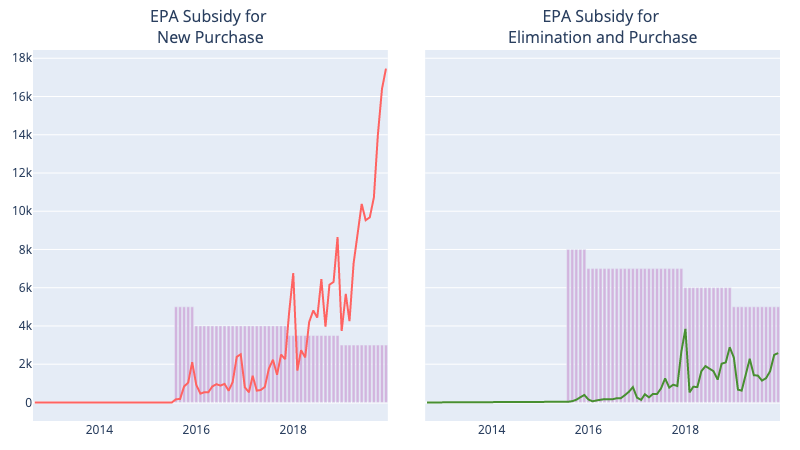

In [11]:
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=[
        "EPA Subsidy for <br>New Purchase",
        "EPA Subsidy for <br>Elimination and Purchase",
    ],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["epa_app"],
        marker_color="#ff6361",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["epa_app"],
        marker_color="#488f31",
    ),
    row=1,
    col=2,
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["epa_amt"],
        marker_color="#D2B4DE",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["epa_amt"],
        marker_color="#D2B4DE",
    ),
    row=1,
    col=2,
)

fig.update_layout(
    showlegend=False, width=1200, height=675,
    margin={'r':20,'t':50,'l':20,'b':20}
)

fig.show(renderer="png", width=800, height=450)
#fig.write_image('output/results4.png')

### Local
The amount is the average number of all cities. The rebatement went up incrementally.

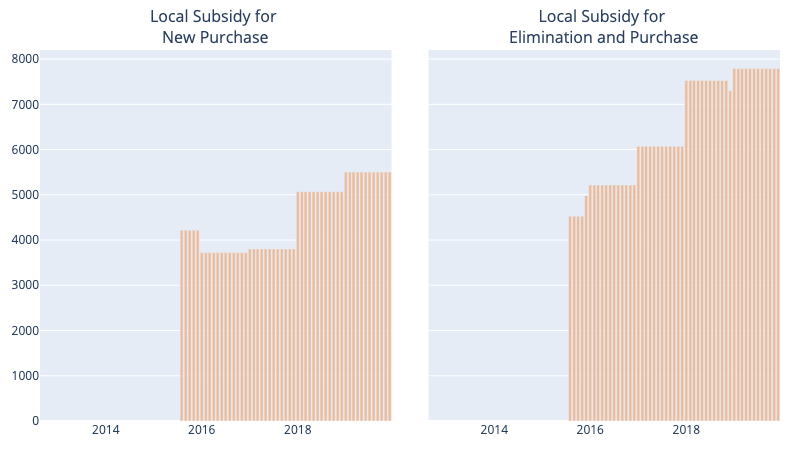

In [12]:
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=[
        "Local Subsidy for <br>New Purchase",
        "Local Subsidy for <br>Elimination and Purchase",
    ],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
)


fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["local_amt"],
        marker_color="#EDBB99",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["local_amt"],
        marker_color="#EDBB99",
    ),
    row=1,
    col=2,
)

fig.update_layout(
    showlegend=False, width=1200, height=675,
    margin={'r':20,'t':50,'l':20,'b':20}
)

fig.show(renderer="png", width=800, height=450)
#fig.write_image('output/results5.png')

### Total Subsidy
Now, combining the amount from three different kind of subsidy. The application number is the higher count between `epa_app` and `moea_app`. 

For **New Purchase**, the subsidy amount remained relatively stable after August 2015, but the application number continuously climbed to over 30,000 per month. For **Elimination and New Purchase**, the total amount was almost constant after August 2015, and the number of application fluctuated but generally followed an upward trend. 

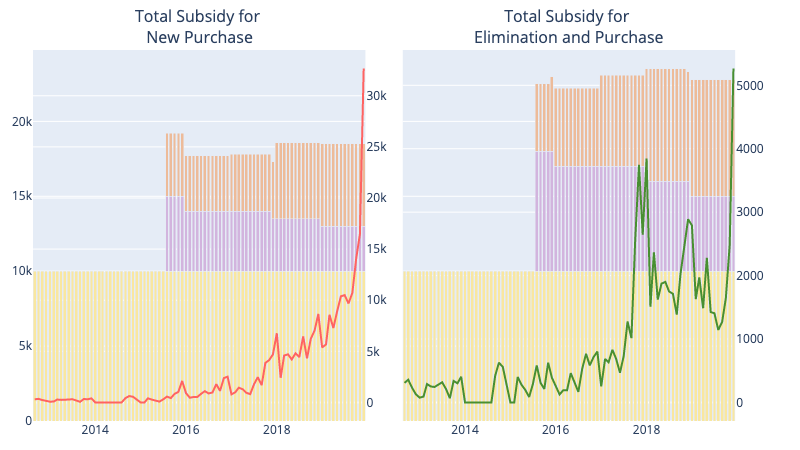

In [13]:
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=[
        "Total Subsidy for <br>New Purchase",
        "Total Subsidy for <br>Elimination and Purchase",
    ],
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    specs=[[{"secondary_y": True},{"secondary_y": True}]]
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["moea_amt"],
        marker_color="#F9E79F",
    ),
    row=1,
    col=1,
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["epa_amt"],
        marker_color="#D2B4DE",
    ),
    row=1,
    col=1,
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"]["local_amt"],
        marker_color="#EDBB99",
    ),
    row=1,
    col=1,
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "New Purchase"]["time"],
        y=sub[sub["type"] == "New Purchase"][['epa_app','moea_app']].max(axis=1),
        marker_color="#ff6361"
    ),
    row=1,
    col=1,
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["moea_amt"],
        marker_color="#F9E79F",
    ),
    row=1,
    col=2,
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["epa_amt"],
        marker_color="#D2B4DE",
    ),
    row=1,
    col=2,
    secondary_y=False
)

fig.add_trace(
    go.Bar(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"]["local_amt"],
        marker_color="#EDBB99",
    ),
    row=1,
    col=2,
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=sub[sub["type"] == "Elimination and Purchase"]["time"],
        y=sub[sub["type"] == "Elimination and Purchase"][['epa_app','moea_app']].max(axis=1),
        marker_color="#488f31",
    ),
    row=1,
    col=2,
    secondary_y=True
)

fig.update_layout(
    showlegend=False, width=1200, height=675, barmode='stack',
    margin={'r':20,'t':50,'l':20,'b':20}
)

fig.show(renderer="png", width=800, height=450)
#fig.write_image('output/results6.png')

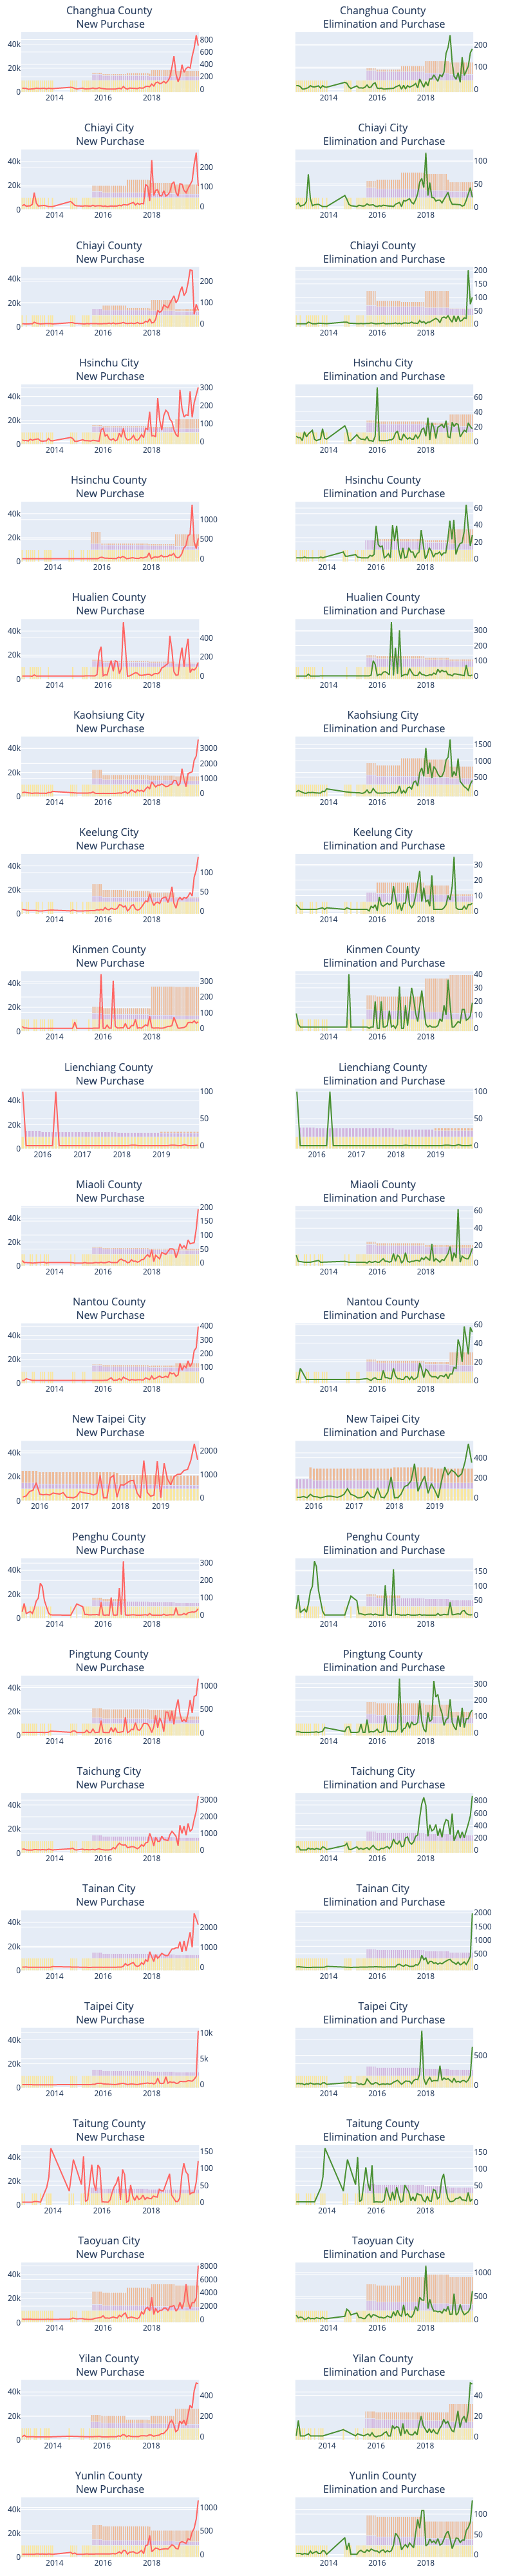

In [78]:
sub_titles = []

for i in sorted(data['city'].unique().tolist()):
    sub_titles.append(i + ' <br>New Purchase')
    sub_titles.append(i + ' <br>Elimination and Purchase')

fig = make_subplots(
    rows=22,
    cols=2,
    shared_yaxes=True,
    subplot_titles=sub_titles,
    specs=[[{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}],
           [{"secondary_y": True},{"secondary_y": True}], 
           [{"secondary_y": True},{"secondary_y": True}]]
    )

row_num = 1
col_num = 1

for city in sorted(data['city'].unique().tolist()):
    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='New Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='New Purchase')]['moea_amt'],
            marker_color="#F9E79F",
        ),
        row=row_num,
        col=1,
        secondary_y=False
    )

    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='New Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='New Purchase')]['epa_amt'],
            marker_color="#D2B4DE"
        ),
        row=row_num,
        col=1,
        secondary_y=False
    )

    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='New Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='New Purchase')]['local_amt'],
            marker_color="#EDBB99",
        ),
        row=row_num,
        col=1,
        secondary_y=False
    )

    fig.add_trace(
        go.Scatter(
            x = data[(data['city']==city) & (data['type']=='New Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='New Purchase')][['epa_app','moea_app']].max(axis=1),
            marker_color="#ff6361"
        ),
        row=row_num,
        col=1,
        secondary_y=True
    )

    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['moea_amt'],
            marker_color="#F9E79F",
        ),
        row=row_num,
        col=2,
        secondary_y=False
    )

    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['epa_amt'],
            marker_color="#D2B4DE"
        ),
        row=row_num,
        col=2,
        secondary_y=False
    )

    fig.add_trace(
        go.Bar(
            x = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['local_amt'],
            marker_color="#EDBB99",
        ),
        row=row_num,
        col=2,
        secondary_y=False
    )

    fig.add_trace(
        go.Scatter(
            x = data[(data['city']==city) & (data['type']=='Elimination and Purchase')]['time'],
            y = data[(data['city']==city) & (data['type']=='Elimination and Purchase')][['epa_app','moea_app']].max(axis=1),
            marker_color="#488f31"
        ),
        row=row_num,
        col=2,
        secondary_y=True
    )

    row_num += 1


fig.update_layout(
    showlegend=False, width=800, height=6000, barmode='stack',
    margin = {'r':20,'t':50,'l':20,'b':20}
)

fig.update_yaxes(range=[0, 50000], secondary_y=False)

fig.show(renderer="png", width=800, height=4000)
#fig.write_image('output/results7.png')